In [1]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from workflow.data_utils import *

In [2]:
URL = 'https://drive.google.com/file/d/1hdFfAk9A954GU4yuNc7_liyl-a90-5IM/view?usp=sharing'

In [3]:
df = data_loading(
    url=URL,
    filename='AirPassengers.csv')

df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


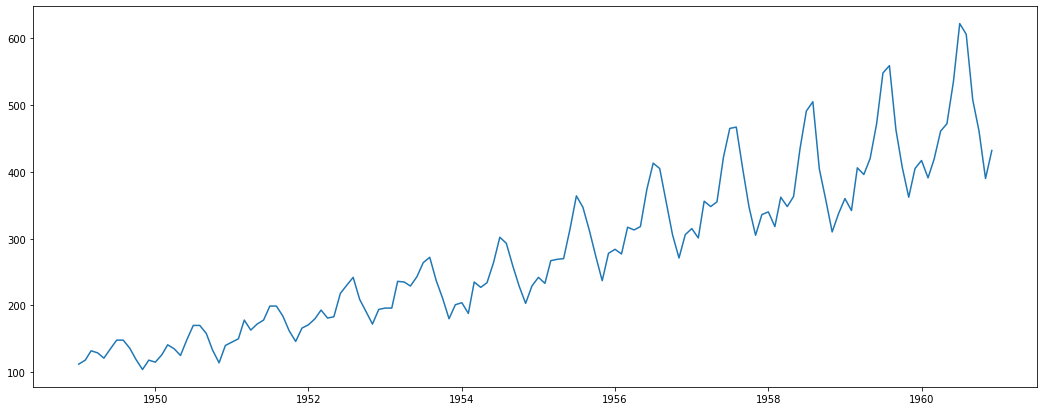

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,7))
plt.plot(df.Month, df['Passengers'])

In [39]:
df.set_index('Month', inplace = True)

Text(0, 0.5, 'Number of Passengers')

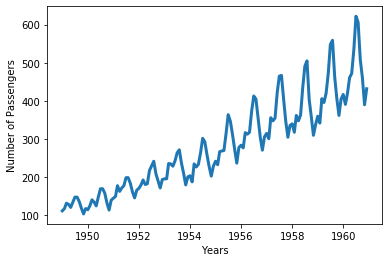

In [40]:
plt.plot(df['Passengers'], linewidth = 3)
plt.xlabel('Years')
plt.ylabel('Number of Passengers')


In [41]:
#Now the rolling statistics
rolmean = df.rolling(window= 12).mean() #Gives a series of means of the number of previous values equals the window size.
print(rolmean.head(20))
rolstd = df.rolling(window=12).std()
print(rolstd.head(20))

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01    13.720147
1950-01-01    13.453342
1950-02-01    13.166475
1950-03-01    13.686977
1950-04-01    13.822467
1950-05-01    13.663710
1950-06-01    14

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

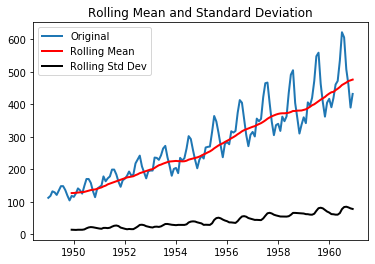

In [42]:
plt.plot(df['#Passengers'], linewidth = 2, label = 'Original')
plt.plot(rolmean, linewidth = 2, label = 'Rolling Mean', color = 'r')
plt.plot(rolstd, linewidth = 2, label = 'Rolling Std Dev', color = 'k')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Standard Deviation')

In [44]:
#Performing Augumented Dickey Fuller Test
print('Results of the Dickey Fuller Test')
dftest = adfuller(x = df['#Passengers'], autolag= 'AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)
for key,value in dftest[4].items():
    print('Critical Value ({}) = {}'.format(key,value))

Results of the Dickey Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64
Critical Value (1%) = -3.4816817173418295
Critical Value (5%) = -2.8840418343195267
Critical Value (10%) = -2.578770059171598


Text(0, 0.5, 'Number of Passengers')

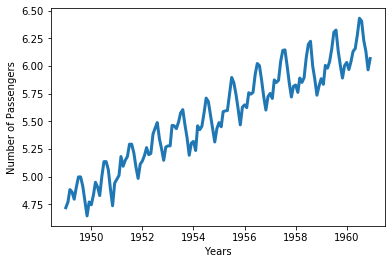

In [47]:
df_log = np.log(df)
plt.plot(df_log['#Passengers'], linewidth = 3)
plt.xlabel('Years')
plt.ylabel('Number of Passengers')

Text(0.5, 1.0, 'Moving Average')

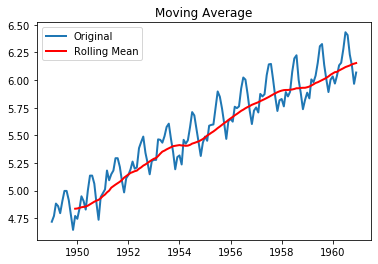

In [48]:
#Tranformation to make stationary
movingAverage = df_log.rolling(window= 12).mean()
movingStd = df_log.rolling(window=12).std()
plt.plot(df_log['#Passengers'], linewidth = 2, label = 'Original')
plt.plot(movingAverage, linewidth = 2, label = 'Rolling Mean', color = 'r')
plt.legend(loc = 'best')
plt.title('Moving Average')

In [49]:
dfLogScaleMinusMovingAverage = df_log - movingAverage
#Removing the NaN Values
dfLogScaleMinusMovingAverage.dropna(inplace= True)

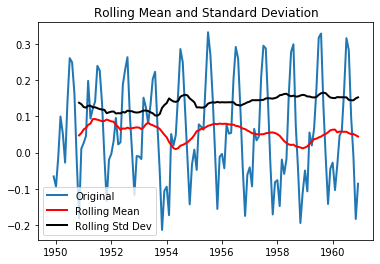

Results of the Dickey Fuller Test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
dtype: float64
Critical Value (1%) = -3.4865346059036564
Critical Value (5%) = -2.8861509858476264
Critical Value (10%) = -2.579896092790057


In [50]:
def test_stationary(timeseries):
    #Determining Rolling Statistics
    movingAverage = timeseries.rolling(window = 12).mean()
    movingStd = timeseries.rolling(window = 12).std()
    
    #Plotting Rolling Statistics
    plt.plot(timeseries, linewidth = 2, label = 'Original')
    plt.plot(movingAverage, linewidth = 2, label = 'Rolling Mean', color = 'r')
    plt.plot(movingStd, linewidth = 2, label = 'Rolling Std Dev', color = 'k')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()
    
    #Performing Dickey Fuller Test
    #Performing Augumented Dickey Fuller Test
    print('Results of the Dickey Fuller Test')
    dftest = adfuller(x = timeseries['#Passengers'], autolag= 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(dfoutput)
    for key,value in dftest[4].items():
        print('Critical Value ({}) = {}'.format(key,value))
        
test_stationary(dfLogScaleMinusMovingAverage)


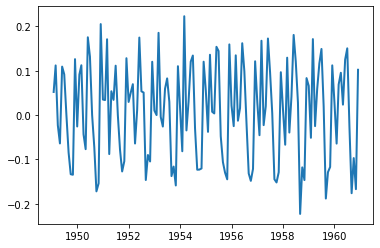

In [51]:
dfLogTimeShift = df_log.shift()
dfLogDiffShift = df_log - dfLogTimeShift 
plt.plot(dfLogDiffShift, linewidth = 2)
plt.show()

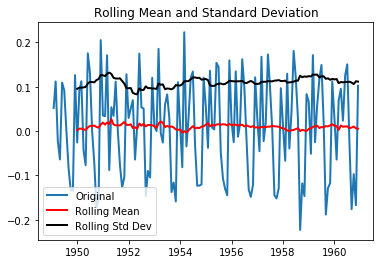

Results of the Dickey Fuller Test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
dtype: float64
Critical Value (1%) = -3.4825006939887997
Critical Value (5%) = -2.884397984161377
Critical Value (10%) = -2.578960197753906


In [52]:
dfLogDiffShift.dropna(inplace= True)
test_stationary(dfLogDiffShift)

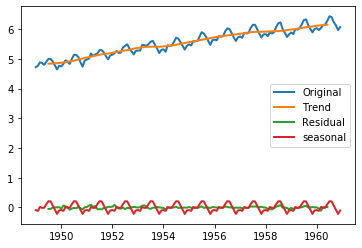

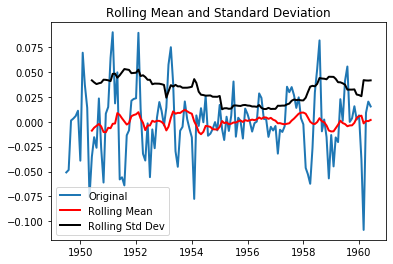

Results of the Dickey Fuller Test
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
dtype: float64
Critical Value (1%) = -3.4851223522012855
Critical Value (5%) = -2.88553750045158
Critical Value (10%) = -2.5795685622144586


In [53]:
decomposition = seasonal_decompose(df_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.plot(df_log, label = 'Original', linewidth = 2)
plt.plot(trend, label = 'Trend', linewidth = 2)
plt.plot(residual, label = 'Residual', linewidth = 2)
plt.plot(seasonal,label = 'seasonal', linewidth = 2)
plt.legend()
plt.show()

decomposedLog = residual
decomposedLog.dropna(inplace = True)
test_stationary(decomposedLog)

/home/abelardo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


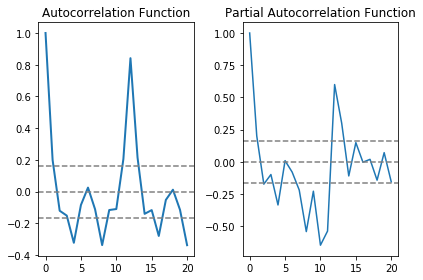

In [54]:
lag_acf = acf(dfLogDiffShift, nlags = 20)
lag_pacf = pacf(dfLogDiffShift, nlags = 20, method= 'ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf, linewidth = 2)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(dfLogDiffShift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dfLogDiffShift)), linestyle='--', color='gray')
plt.title('Autocorrelation Function') 

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dfLogDiffShift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dfLogDiffShift)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout() 

/home/abelardo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/abelardo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


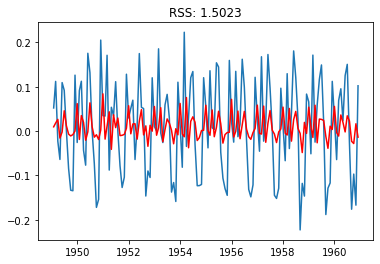

In [71]:
model = ARIMA(df_log, order=(2,1,0))
results_AR = model.fit(disp = -1)
plt.plot(dfLogDiffShift)
plt.plot(results_AR.fittedvalues, color = 'r')
plt.title('RSS: {:.4f}'.format(sum((results_AR.fittedvalues - dfLogDiffShift['#Passengers'])**2)))
print('Plotting AR model')

/home/abelardo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/abelardo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA model


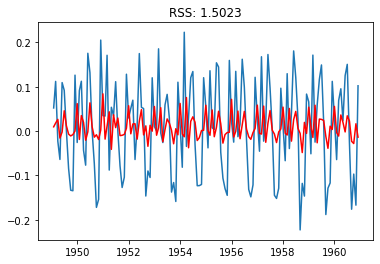

In [72]:
model = ARIMA(df_log, order=(0,1,2))
results_MA = model.fit(disp = -1)
plt.plot(dfLogDiffShift)
plt.plot(results_AR.fittedvalues, color = 'r')
plt.title('RSS: {:.4f}'.format(sum((results_AR.fittedvalues - dfLogDiffShift['#Passengers'])**2)))
print('Plotting MA model')

/home/abelardo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/abelardo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA model


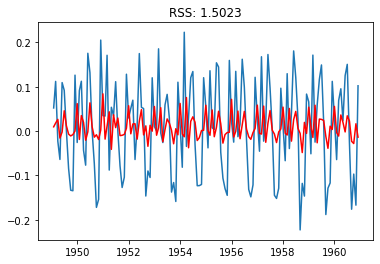

In [78]:
model = ARIMA(df_log, order=(2,1,2))
results_ARIMA = model.fit(disp = -1)
plt.plot(dfLogDiffShift)
plt.plot(results_AR.fittedvalues, color = 'r')
plt.title('RSS: {:.4f}'.format(sum((results_AR.fittedvalues - dfLogDiffShift['#Passengers'])**2)))
print('Plotting ARIMA model')

In [79]:
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues, copy= True)
print(predictions_ARIMA.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [80]:
#Convet to cumulative sum
predictions_ARIMA_cumsum = predictions_ARIMA.cumsum()
predictions_ARIMA_cumsum.head(10)

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
1949-07-01    0.021984
1949-08-01    0.011007
1949-09-01   -0.018922
1949-10-01   -0.053389
1949-11-01   -0.064668
dtype: float64

In [81]:
predictions_ARIMA_log = pd.Series(df_log['#Passengers'].iloc[0], index = df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

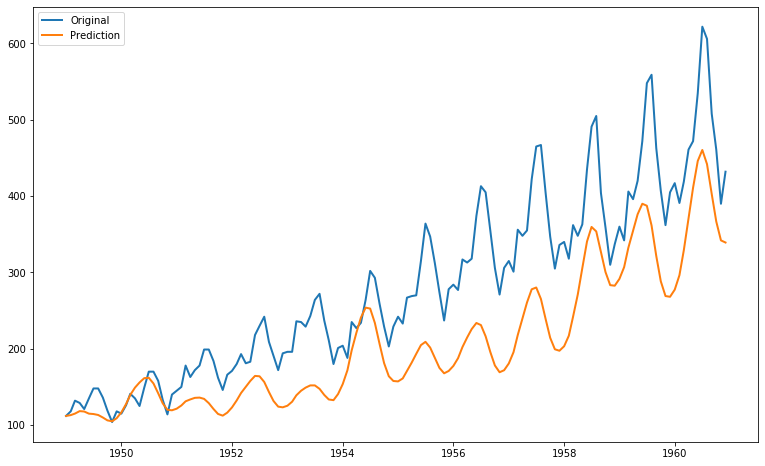

In [82]:
#Inverse of log is exponent
plt.figure(figsize=(13,8))
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df, linewidth = 2, label = 'Original')
plt.plot(predictions_ARIMA, linewidth = 2, label = 'Prediction')
plt.legend()
plt.show()

<Figure size 936x576 with 0 Axes>

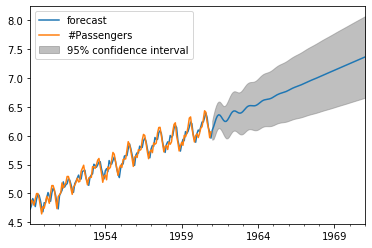

In [63]:
plt.figure(figsize=(13,8))
results_ARIMA.plot_predict(1,264)
plt.legend(loc = 'upper left')
plt.show()